<a href="https://colab.research.google.com/github/helloKH/python_study/blob/master/Psypy_numpy_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Psypy 4회차 
- numpy & Pandas 실습자료
- 실습교재: Python for data analysis 2nd.
- Chapter 4 ~ 5

In [2]:
!python -V

Python 3.6.9


#### Numpy에서 제공하는 것들
- 효율적인 다차원 배열인 ndarray는 빠른 배열 계산과 유연한 **브로드캐스팅** 기능을 제공
- 반복문을 작성할 필요 없이 전체 데이터배열을 빠르게 계산할 수 있는 표준 수학함수
- 배열데이터를 디스크에 쓰거나 읽을 수 있는 도구와 메모리에 적재된 파일을 다루는 도구
- 선형대수, 난수 생성기, 푸리에 변환 기능
- C, C++, 포드란으로 작성한 코드를 연결할 수 있는 C API

In [0]:
import numpy as np

#### 4.1 ndarray
- N차원의 배열 객체이며, 대규모 데이터 집합을 다룰 수 있는 빠르고 유연한 자료 구조

In [0]:
#### 임의의 값 생성
data = np.random.randn(2,3)
data

array([[-0.07779822,  2.073489  ,  0.76026552],
       [ 0.7516605 ,  1.18407855,  1.114874  ]])

In [0]:
data * 10 # 산술연산

array([[-0.7779822 , 20.73489005,  7.60265521],
       [ 7.51660498, 11.8407855 , 11.14874001]])

In [0]:
data + data

array([[-0.15559644,  4.14697801,  1.52053104],
       [ 1.503321  ,  2.3681571 ,  2.229748  ]])

- ndarray는 같은 종류의 데이터를 담을 수 있는 다차열 배열이다. ndarray의 모든 원소는 같은 자료형이어야 한다
  - shape: 각 차원의 크기를 알려주며, 튜플 형태로 제시
  - dtype: 배열에 저장된 자료형을 알려주는 객체

In [0]:
print(data.shape)

data.dtype

(2, 3)


dtype('float64')

#### 4.1.1 ndarray 생성

In [0]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [0]:
# 같은 길이를 가진 리스트는 다차월 배열 변환 가능
data2 = [[1,2,3,4], [5,6,7,8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [0]:
arr2.ndim

2

In [0]:
arr2.shape

(2, 4)

In [0]:
# np.array의 자료형은 추론되어 dtype에 저장됨
print(arr1.dtype)
print(arr2.dtype)

float64
int64


In [0]:
# 배열에 0 생성
np.zeros(10)
print(np.zeros((2,3,2)))

# 배열에 1 생성
np.ones(4)
np.ones((2,3,1))

[[[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]]


array([[[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]]])

In [0]:
# np.arange는 range의 함수 버전
np.arange(4)

array([0, 1, 2, 3])

#### 4.1.2 ndarray의 dtype

In [6]:
# dtype는 ndarray가 메모리를 해석하기 위해 필요한 정보(메타데이터)를 담고 있음
arr1 = np.array([1,2,3], dtype=np.float64)
arr2 = np.array([1,2,3], dtype=np.int32)

arr1.dtype
arr2.dtype

dtype('int32')

In [9]:
#astype를 통해 배열의 dtype를 다른 형으로 변환
arr = np.array([1,2,3,4,5])
print(arr.dtype)

float_arr = arr.astype(np.float64)
float_arr.dtype

int64


dtype('float64')

In [10]:
#부동소수점은 아래 자리가 버려짐
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
print(arr)
arr.astype(np.int32)

[ 3.7 -1.2 -2.6  0.5 12.9 10.1]


array([ 3, -1, -2,  0, 12, 10], dtype=int32)

In [11]:
#숫자 형식의 문자열은 숫자로 변환 가능
numberic_strings = np.array(['1.25', '-9.6', '42'], dtype = np.string_)
numberic_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

#### 4.13 Numpy 배열 산술 연산
- 배열은 for문을 사용하지 않고 데이터를 일괄 처리할 수 있다는 장점이 있음.
- 이를 벡터화라고 하며, 같은 크기의 배열 간 산술 연산은 각 원소 단위로 적용

In [15]:
arr = np.array([[1,2,3], [4,5,6]])
print(arr)
print(arr*arr)
print(arr - arr)

[[1 2 3]
 [4 5 6]]
[[ 1  4  9]
 [16 25 36]]
[[0 0 0]
 [0 0 0]]


In [16]:
# 같은 크기의 배열 간 비교는 불리언, 다른 크기의 배열은 브로드캐스팅 적용
arr2 = np.array([[0, 4, 1], [7, 2, 12]])
arr
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

#### 4.1.4 색인과 슬라이싱 기초

In [5]:
#1차원 배열은 리스트와 유사하게 동작
arr = np.arange(10)
print(arr)
print(arr[5])
print(arr[5:8])
arr[5:8] = 12
print(arr)

[0 1 2 3 4 5 6 7 8 9]
5
[5 6 7]
[ 0  1  2  3  4 12 12 12  8  9]


In [6]:
# numpy 배열은 복사되지 않는다
# 배열조각은 원본의 뷰로, 데이터는 복사되지 않고 뷰에 대한 변경은 원본 배열에 반영
arr_slice = arr[5:8]
print(arr_slice)

arr_slice[1] = 12345
print(arr)

arr_slice[2] = 3
print(arr)

print(arr_slice)

[12 12 12]
[    0     1     2     3     4    12 12345    12     8     9]
[    0     1     2     3     4    12 12345     3     8     9]
[   12 12345     3]


In [8]:
# 뷰 대신 ndarray의 슬라이스의 복사본을 얻고 싶다면 .copy를 사용한다
arr[5:8].copy()

array([   12, 12345,     3])

In [11]:
#단순히 [:]는 배열의 모든 값 할당
arr_slice[:]  =64
arr_slice


array([64, 64, 64])

In [16]:
#2차원 배열(행렬)에서 각 색인에 해당하는 요소는 1차원 배열
arr2d = np.array([[1,2,3], [4,5,6], [7,8,9]])
arr2d[2]

#콤마로 구분된 색인 리스트 넘기기
arr2d[2][0]

arr2d[0, 2]

3

In [24]:
#다차원 배열에서 마지막 색인을 생략할 때 반환되는 객체는 상위 차원의 데이터를 포함한 한 차원 낮은 ndarray(텐서 -> 행령, 행렬 -> 배열)
arr3d = ([[[1,2,3], [4,5,6]], [[7,8,9], [9,10,11]]])
arr3d

[[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [9, 10, 11]]]

In [25]:
arr3d[0] # 2 x 3 배열

[[1, 2, 3], [4, 5, 6]]

- 슬라이스로 선택하기


In [28]:
arr2d[:2] #시작부터 두번째 row까지 선택

array([[1, 2, 3],
       [4, 5, 6]])

In [29]:
arr2d[:2, 1:]


array([[2, 3],
       [5, 6]])

#### 4.1.5 불리언 값으로 선택

In [0]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)

In [31]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [32]:
data

array([[-1.33458251, -1.24979595, -0.71761731, -0.40723833],
       [-0.262714  ,  0.16087214,  0.02004901, -0.82991284],
       [ 0.66481812,  1.03982497,  1.4359695 ,  0.46394048],
       [ 0.45167434,  0.57170577, -0.15811904,  0.18970495],
       [-1.54157059, -1.62261609,  0.75956965,  0.80204636],
       [-0.66846822,  0.57686788,  0.1028832 ,  0.7088873 ],
       [ 0.27471918, -0.01106891, -0.00583349, -0.27276468]])

- 불리언 배열을 배열의 색인으로 사용

In [33]:
data[names == 'Bob']

array([[-1.33458251, -1.24979595, -0.71761731, -0.40723833],
       [ 0.45167434,  0.57170577, -0.15811904,  0.18970495]])

In [34]:
data[names == 'Bob', 2:]

array([[-0.71761731, -0.40723833],
       [-0.15811904,  0.18970495]])

In [35]:
data[names == 'Bob', 3]

array([-0.40723833,  0.18970495])

- Bob이 아닌 요소는 != 혹은 ~을 사용한 조건절 부인

In [36]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [37]:
data[~(names == 'Bob')]

array([[-0.262714  ,  0.16087214,  0.02004901, -0.82991284],
       [ 0.66481812,  1.03982497,  1.4359695 ,  0.46394048],
       [-1.54157059, -1.62261609,  0.75956965,  0.80204636],
       [-0.66846822,  0.57686788,  0.1028832 ,  0.7088873 ],
       [ 0.27471918, -0.01106891, -0.00583349, -0.27276468]])

In [38]:
cond = names == 'Bob'
data[~cond]

array([[-0.262714  ,  0.16087214,  0.02004901, -0.82991284],
       [ 0.66481812,  1.03982497,  1.4359695 ,  0.46394048],
       [-1.54157059, -1.62261609,  0.75956965,  0.80204636],
       [-0.66846822,  0.57686788,  0.1028832 ,  0.7088873 ],
       [ 0.27471918, -0.01106891, -0.00583349, -0.27276468]])

- 논리연산자 통해 &(and) 나 |(or) 로 여러 불리언 사용 가능

In [39]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [40]:
data[data < 0] = 0
data

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.16087214, 0.02004901, 0.        ],
       [0.66481812, 1.03982497, 1.4359695 , 0.46394048],
       [0.45167434, 0.57170577, 0.        , 0.18970495],
       [0.        , 0.        , 0.75956965, 0.80204636],
       [0.        , 0.57686788, 0.1028832 , 0.7088873 ],
       [0.27471918, 0.        , 0.        , 0.        ]])

In [41]:
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.16087214, 0.02004901, 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.57686788, 0.1028832 , 0.7088873 ],
       [0.27471918, 0.        , 0.        , 0.        ]])

#### 4.1.7 배열 전치와 축 바꾸기
- 배열 전치는 데이터를 복사하지 않고 데이터의 모양이 바뀐 뷰를 반환
- transponse 메서드

In [42]:
arr = np.arange(15).reshape(3, 5)
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [43]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [48]:
#다차원배열은 transponse는 튜플로 축 번호를 받아서 치환(첫 번째, 두 번째 축 순서가 바뀌고 마지막은 그대로임)
arr = np.arange(16).reshape(2,2,4)
print(arr)

arr.transpose((1,0,2))

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

#### 4.2 유니버설 함수
- 교재 참고

#### 4.3 배열지향 프로그래밍
- 반복문 없이 간결한 배열 연산으로 데이터 처리하기

In [51]:
points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [52]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

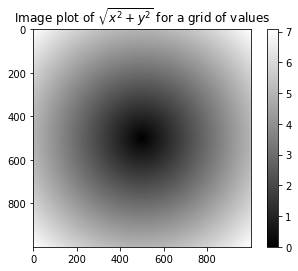

In [54]:
import matplotlib.pyplot as plt

plt.imshow(z, cmap = plt.cm.gray);plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

#### 4.3.1 배열연산으로 조건절 표현하기
- numpy.where는 x if 조건 else y 같은 삼항식의 벡터화 버전

In [0]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [57]:
# cond 값이 True면 x 값을, 아니면 yarr 값을 취하는 함수
# 순수 파이썬으로 큰 배열처리에 늦으며, 다차원배열에서는 사용 불가
result = [(x if c else y)
            for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [59]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

#### 4.3.2 수학 메서드와 통계 메서드

In [60]:
arr = np.random.randn(5, 4)
arr

array([[-0.23088164,  1.52288715,  0.57581038,  1.22661371],
       [-1.02900806,  2.65270894, -0.43508111,  1.79263192],
       [ 1.99371145, -1.22463122, -1.37863835,  0.81079654],
       [ 0.86274755,  1.65621318,  1.143618  , -1.29572009],
       [-0.18419033, -0.12418024,  1.9967183 , -1.89314824]])

In [61]:
arr.mean()

0.42194889209257713

In [62]:
np.mean(arr)

0.42194889209257713

In [63]:
arr.sum()

8.438977841851543

In [66]:
arr.mean(axis = 1) # 선택적으로 axis 인자를 받아서, 해당 axis에 대한 통계 계산 후 한 차수 낮은 배열 반환

array([ 0.7736074 ,  0.74531292,  0.05030961,  0.59171466, -0.05120013])

In [65]:
arr.sum(axis = 0) #0은 기본 값

array([1.41237898, 4.48299781, 1.90242722, 0.64117383])

#### 4.3.3 불리언 배열을 위한 메서드
- 불리언 값을 1(True) or 0(False)로 강제할 수 있다.

In [67]:
arr = np.random.randn(100)
(arr > 0).sum()

49